<a href="https://colab.research.google.com/github/itsbilyatt/data_science_project/blob/main/air%20quality%20index%20predictor/Air_quality_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement : Air Quality Predictive Analysis

# Context
**•To do data analysis on India Air Quality data and predict tha value of Air Quality Index based on given features of concentration of sulphur dioxide, nitrogen dioxide, respirable suspended particualte matter, suspended particulate matter and classify the Air Quality as good, moderate, poor, unhealthy, healthy.**

**•The data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP) year 1990-2015**

# Content
•stn_code (station code)

•sampling_date (date of sample collection)

•state (Indian State)

•location (location of sample collection)

•agency type (type of area)

•so2 (sulphur dioxide concentration)

•no2 (nitrogen dioxide concentration)

•rspm (respirable suspended particualte matter concentration)

•spm (suspended particulate matter)

•location_monitoring_station

•pm2_5 (particulate matter 2.5)

•Date

# Air Quality predictive analysis

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Dataset/AirData.xlsm",header=0)

In [ ]:
df.head(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.shape

(435742, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm                         395520 non-null  float64       
 9   spm                          198355 non-null  float64       
 10  location_monitoring_station  408251 non-null  object        
 11  pm2_5                     

In [ ]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [ ]:
df.nunique()

stn_code                        745
sampling_date                  5070
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [ ]:
col=df.columns
col

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

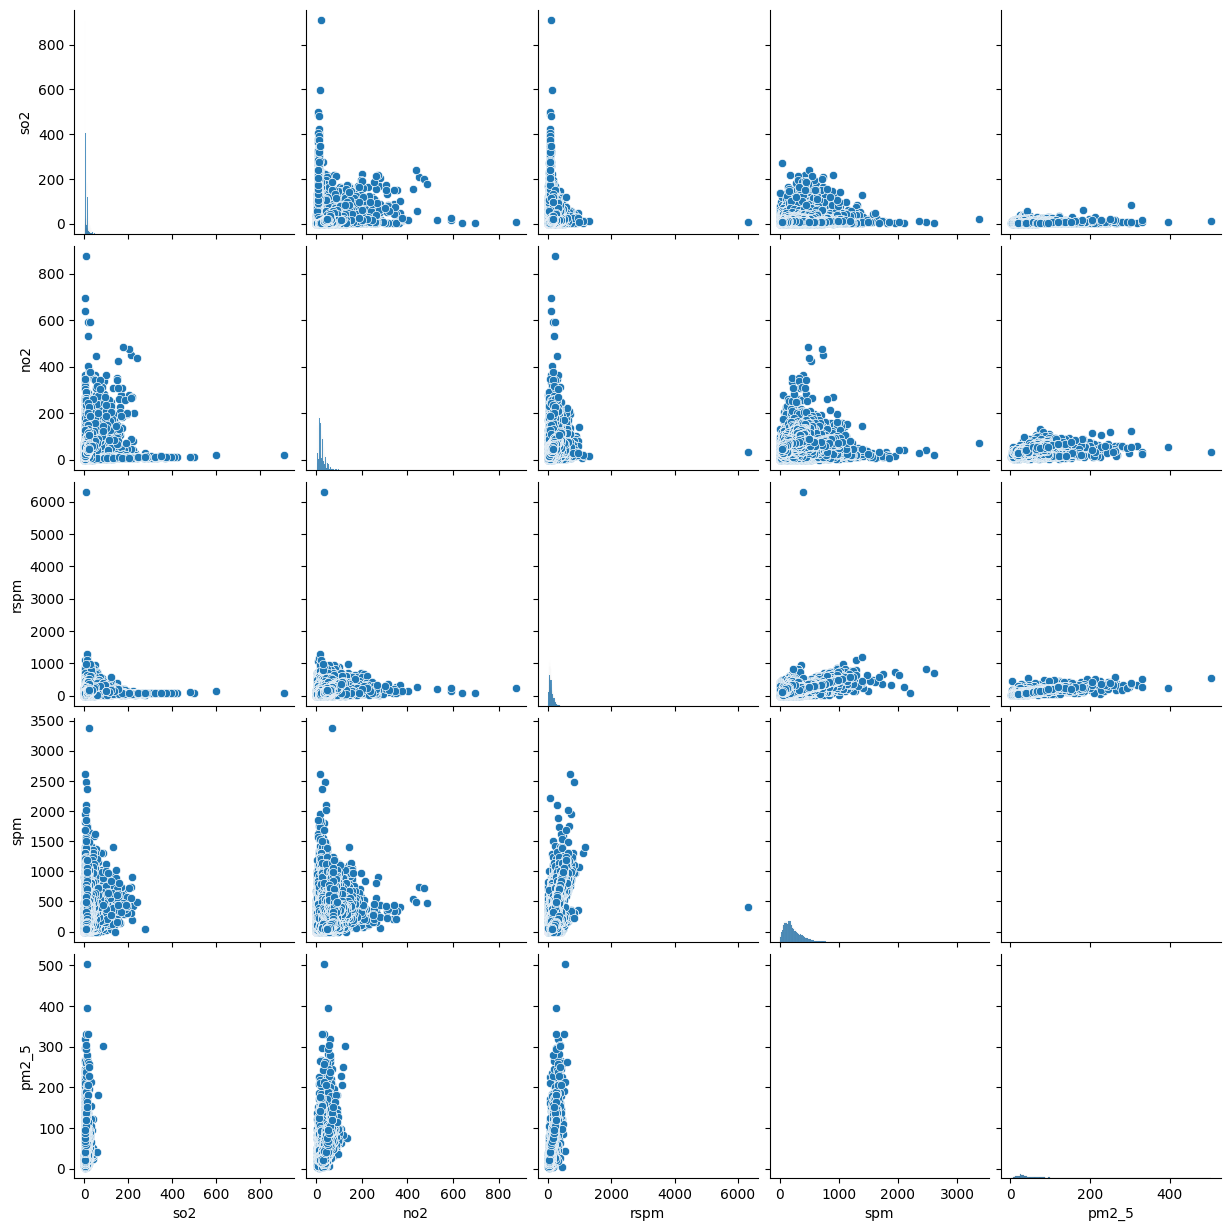

In [ ]:
sns.pairplot(df)

In [ ]:
df["state"].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

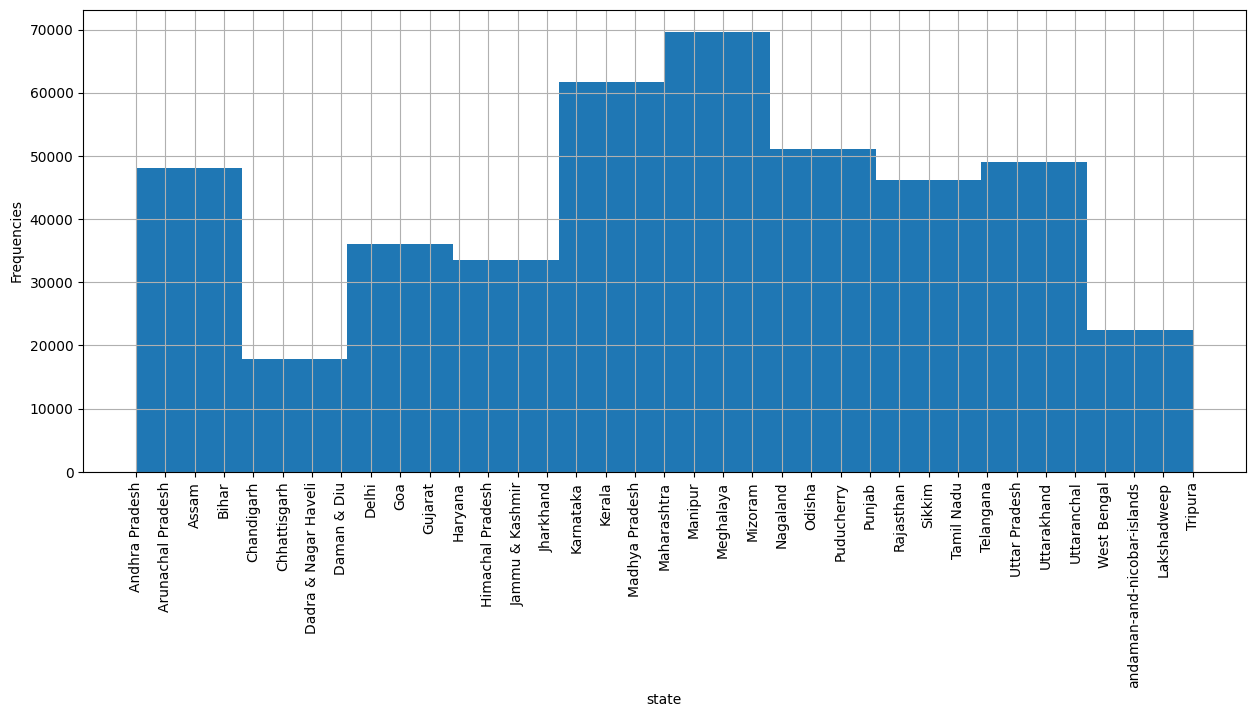

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [ ]:
df["type"].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

Text(0, 0.5, 'frequency')

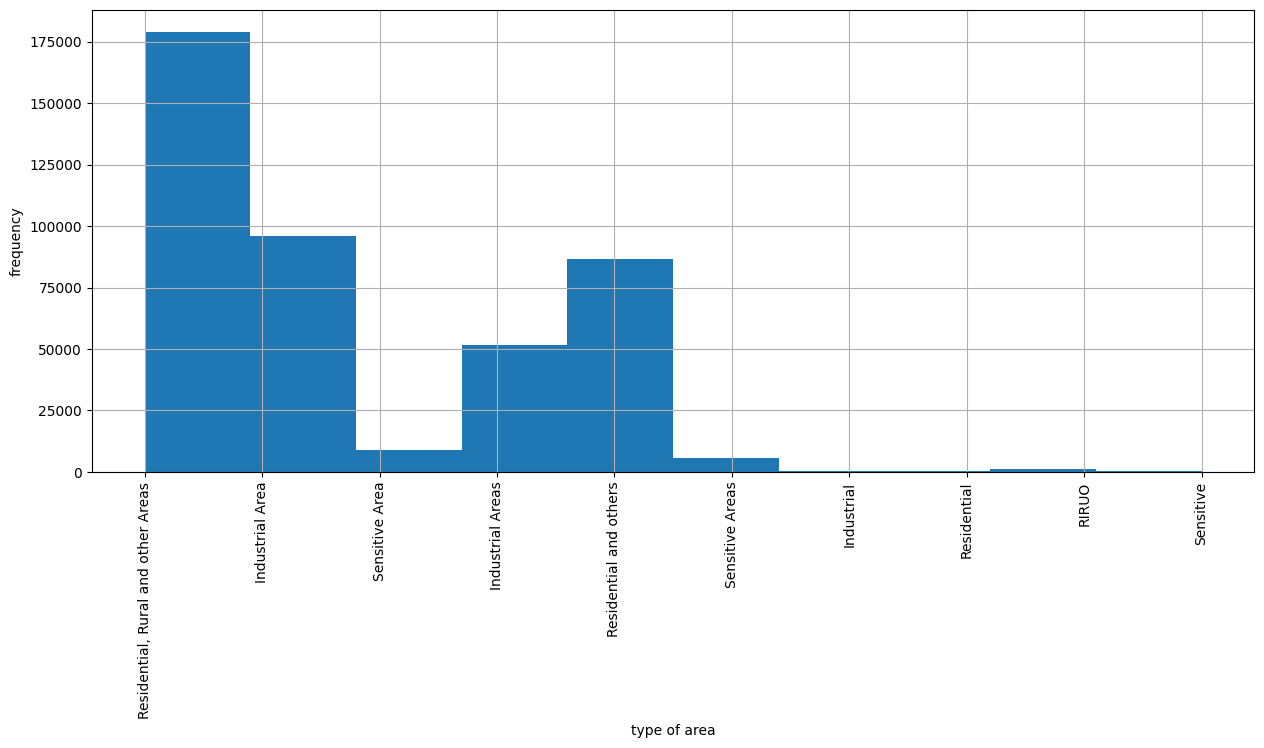

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel("type of area")
plt.ylabel("frequency")

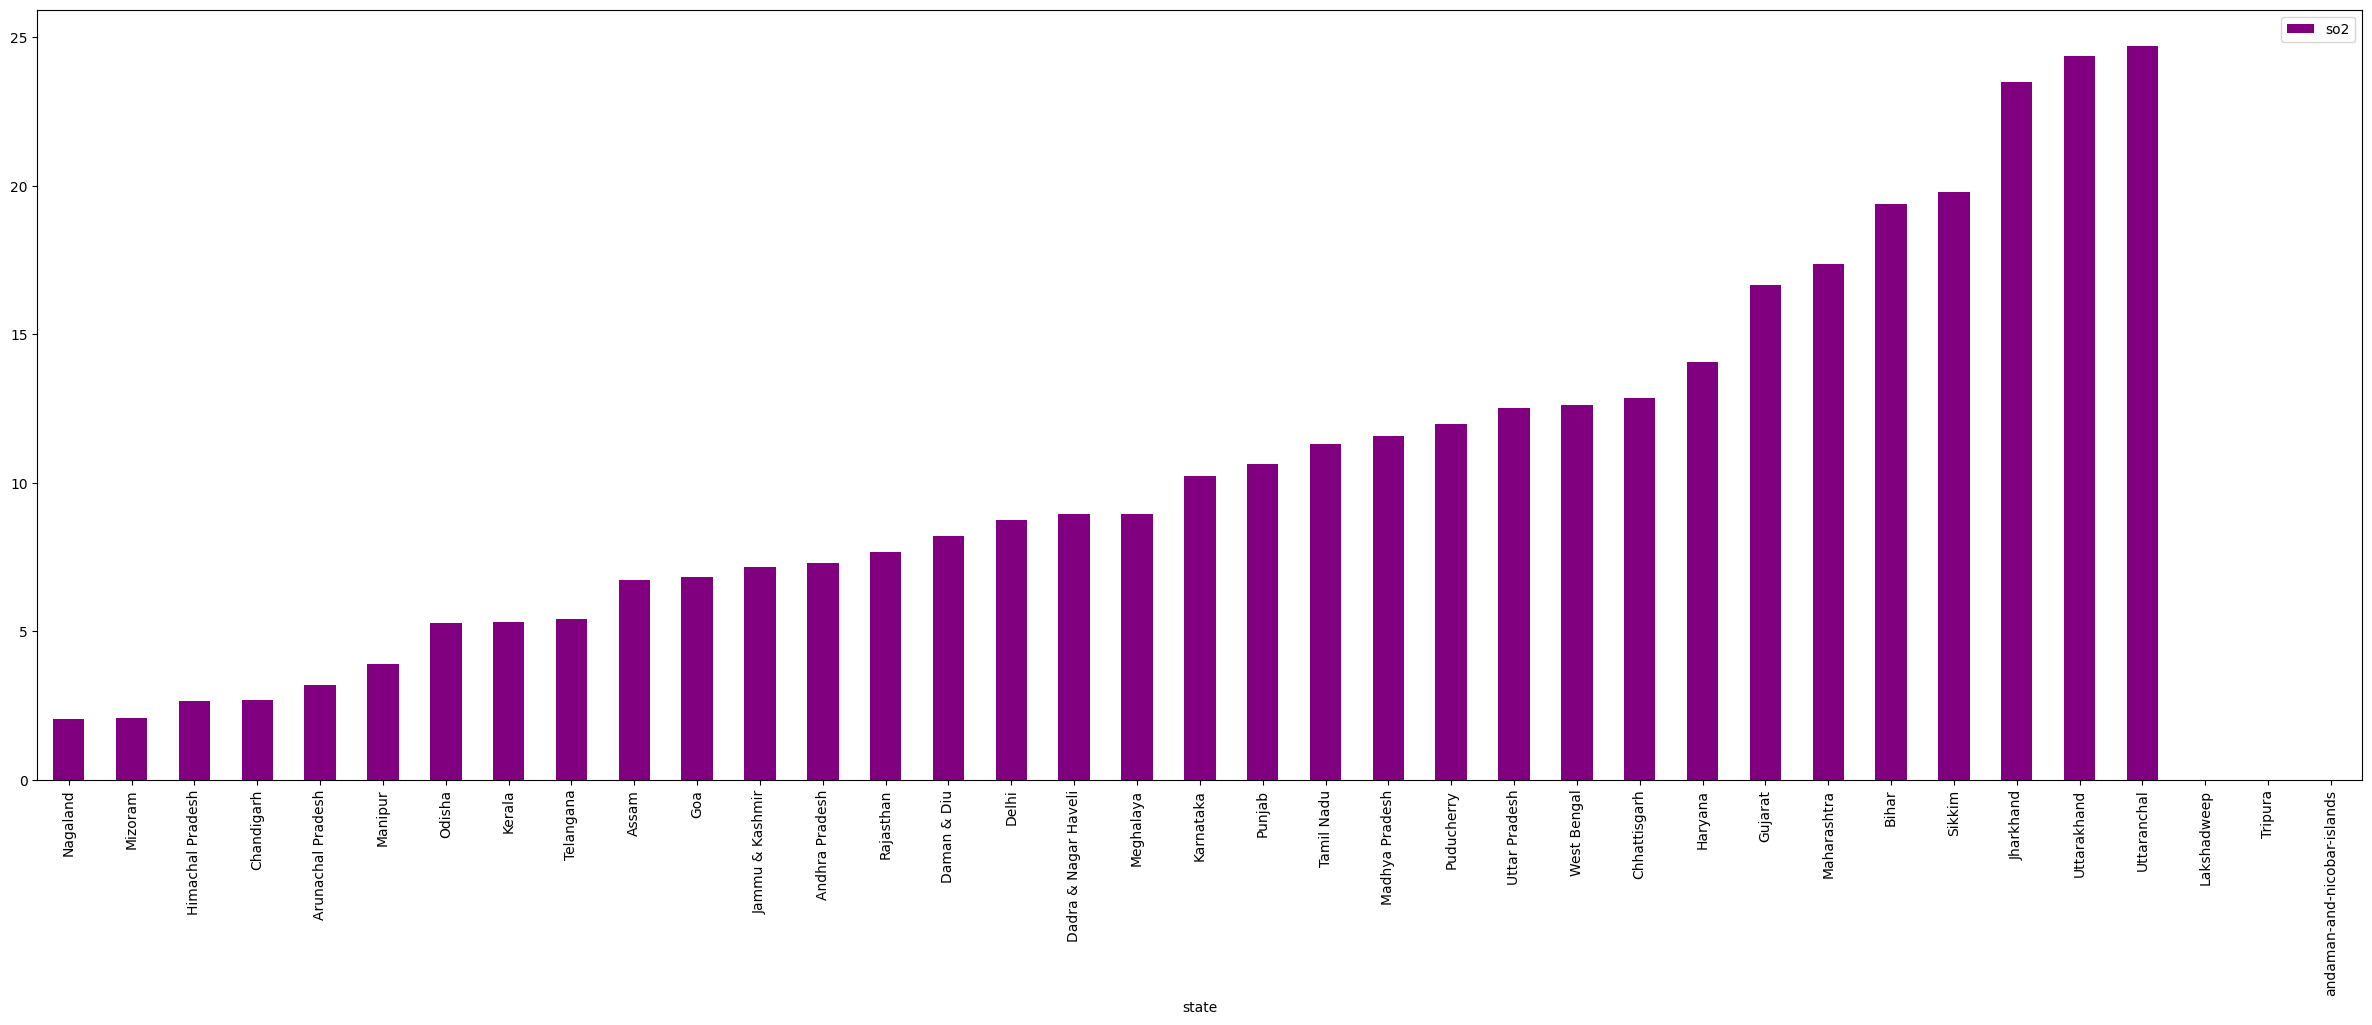

In [ ]:
plt.rcParams["figure.figsize"]=(30,10)
df[["so2","state"]].groupby(["state"]).mean().sort_values(by="so2").plot.bar(color="purple")
plt.show()

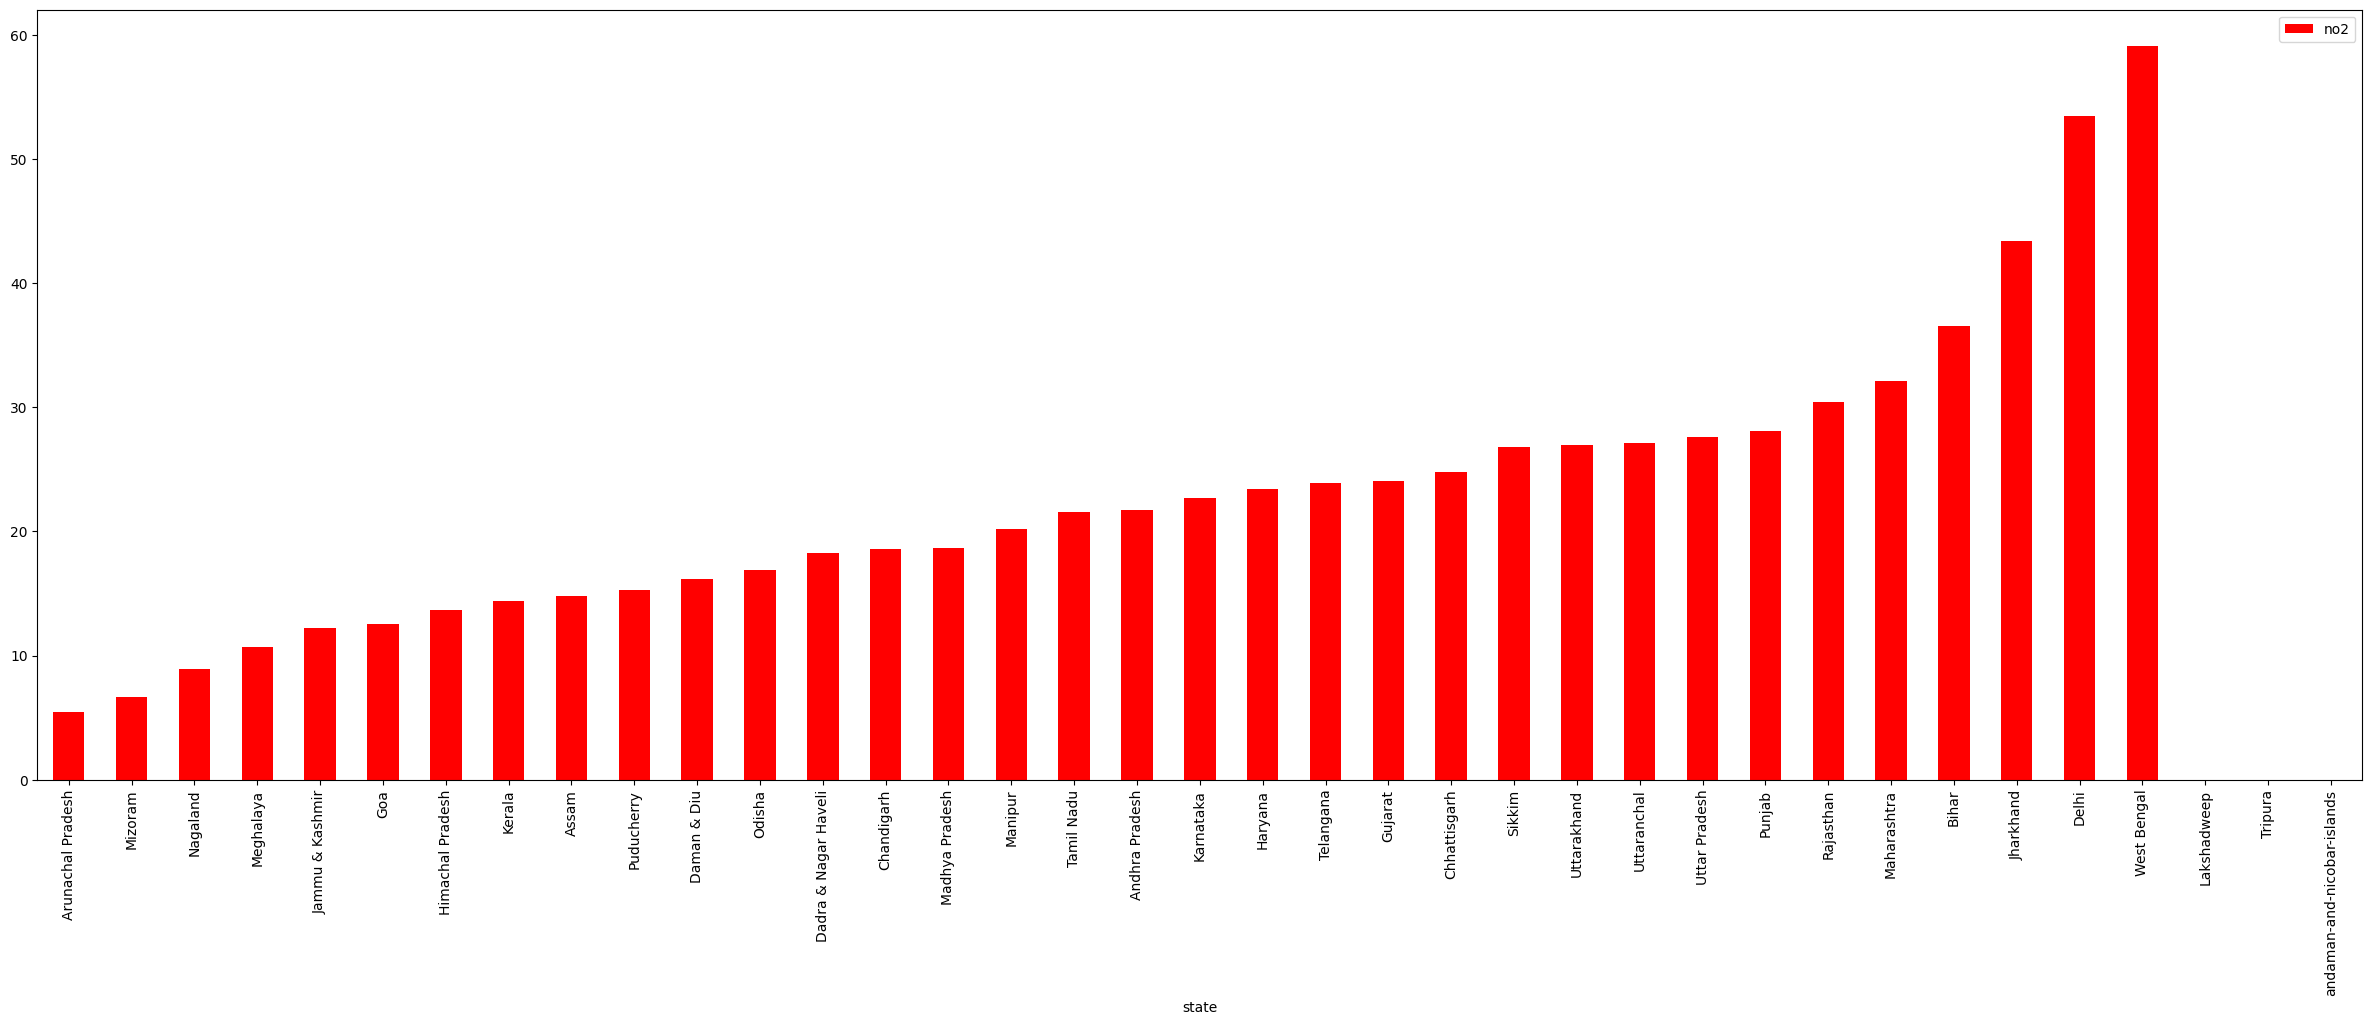

In [ ]:
plt.rcParams["figure.figsize"]=(30,10)
df[["no2","state"]].groupby(["state"]).mean().sort_values(by="no2").plot.bar(color="red")
plt.show()

In [ ]:
null_values=df.isnull().sum().sort_values(ascending=False)
null_values

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [ ]:
percent_null_values=(df.isnull().sum()*100/len(df)).sort_values(ascending=False)
percent_null_values

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [ ]:
missing_data_with_percentage=pd.concat((null_values,percent_null_values),axis=1,keys=["Total","Percentage"])

In [ ]:
missing_data_with_percentage

,Total,Percentage
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [ ]:
df.drop(['agency'],axis=1,inplace=True)

In [ ]:
df.drop(["stn_code"],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [ ]:
df.shape

(435742, 8)

In [ ]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [ ]:
df["location"]=df["location"].fillna(df['location'].mode()[0])

In [ ]:
df["type"]=df["type"].fillna(df['type'].mode()[0])

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0


In [ ]:
def calculate_si(so2):
    si=0
    if (so2<=40):
         si= so2*(50/40)
    if (so2>40 and so2<=80):
         si=50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
         si=100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
         si=200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
         si=300+(so2-800)*(100/800)
    if (so2>1600):
         si=400+(so2-1600)*(100/800)
    return si
df["Soi"]=df["so2"].apply(calculate_si)
soi_data=df[["so2","Soi"]]



In [ ]:
soi_data.head()

,so2,Soi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [ ]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
         ni=no2*50/40
    elif(no2>40 and no2<=80):
         ni=50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
         ni=100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
         ni=200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
         ni=300+(no2-280)*(100/120)
    else:
         ni=400+(no2-400)*(100/120)
    return ni
df["Noi"]=df["no2"].apply(calculate_ni)

In [ ]:
noi_data=df[["no2","Noi"]]

In [ ]:
noi_data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [ ]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
         rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
         rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
         rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
         rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
         rpi=300+(rpi-120)*(100/130)
    else:
         rpi=400+(rpi-250)*(100/130)
    return rpi
df["Rspmi"]=df["rspm"].apply(calculate_)


In [ ]:
rspmi_data=df[["rspm",'Rspmi']]

In [ ]:
rspmi_data.tail()

,rspm,Rspmi
435737,143.0,0.0
435738,171.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [ ]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
         spi=spm
    if(spm<50 and spm<=100):
         spi=spm
    elif(spm>100 and spm<=250):
         spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
         spi=200+(spm-250)
    elif(spm>350 and spm<=450):
         spi=300+(spm-350)*(100/80)
    else:
         spi=400+(spm-430)*(100/80)
    return spi
df["Spmi"]=df["spm"].apply(calculate_spi)


In [ ]:
spmi_data=df[["spm","Spmi"]]
spmi_data.head()

,spm,Spmi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_Pmi(pm2_5):
    pmi=0
    if pm2_5<=30:
        pmi=pm2_5*50/30
    elif pm2_5<=60:
        pmi=50+(pm2_5-30)*50/30
    elif pm2_5<=90:
        pmi=100+(pm2_5-60)*100/30
    elif pm2_5<=120:
        pmi=200+(pm2_5-90)*100/30
    elif pm2_5<=250:
        pmi=300+(pm2_5-120)*100/130
    elif pm2_5>250:
        pmi=400+(pm2_5-250)*(100/130)

df["Pmi"]=df["pm2_5"].apply(cal_Pmi)


In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,Soi,Noi,Rspmi,Spmi,Pmi
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,None
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,None
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,None
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,None
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,None


In [ ]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
         aqi=si
    if(spi>si and spi>ni and spi>rpi):
         aqi=spi
    if(ni>si and ni>spi and ni>rpi):
         aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
         aqi=rpi
    return aqi
df["AQI"]=df.apply(lambda x:calculate_aqi(x["Soi"],x["Noi"],x["Rspmi"],x["Spmi"]),axis=1)
aqi_data=df[["state","Soi","Noi","Rspmi","Spmi","AQI"]]

In [ ]:
aqi_data.tail()

,state,Soi,Noi,Rspmi,Spmi,AQI
435737,West Bengal,27.5,95.0,0.0,0.0,95.0
435738,West Bengal,25.0,90.0,0.0,0.0,90.0
435739,andaman-and-nicobar-islands,0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,0.0,0.0,0.0,0.0,0.0
435741,Tripura,0.0,0.0,0.0,0.0,0.0


In [ ]:
aqi_data.head()

,state,Soi,Noi,Rspmi,Spmi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [ ]:
def Aqi_analysis(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>400:
        return "Hazardous"
df["Aqi_range"]=df["AQI"].apply(Aqi_analysis)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,Soi,Noi,Rspmi,Spmi,Pmi,AQI,Aqi_range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,None,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,None,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,None,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,None,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,None,9.375,Good


In [ ]:
df["Aqi_range"].value_counts()

Good         247199
Poor         102344
Unhealthy     31733
Moderate      19943
Hazardous     18700
Name: Aqi_range, dtype: int64

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics



In [ ]:
model = LinearRegression()

In [ ]:
x=df[["Soi","Noi","Rspmi","Spmi"]]
y=df["AQI"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


In [ ]:
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)


In [ ]:
# RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,train_pred))
# RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,test_pred))
# print("RMSE TrainingData=",str(RMSE_train))
# print("RMSE TestData=",str(RMSE_test))
# print("_"*50)
print("RSqured value on train:",model.score(x_train,y_train))
print("RSqured value on test:",model.score(x_test,y_test))

RSqured value on train: 0.976987932174912
RSqured value on test: 0.9764345472632704


In [ ]:
model.predict([[6.000,21.750,0.0,0.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.21720714])